In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
# load mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

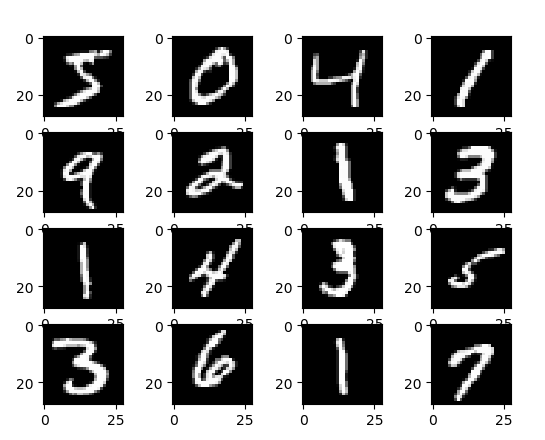

In [25]:
print(x_train.shape, x_test.shape)

# train 데이터는 6만개
# test 데이터는 1만개
# 28x28 사이즈의 흑백 이미지

(60000, 28, 28) (10000, 28, 28)


In [26]:
# CNN의 컨볼루션 레이어는 채널을 가진 데이터형을 받기 때문에 shape을 바꿔준다.
# reshaping

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 이제 이미지가 28x28x1이 됨

In [27]:
# Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), 
                           kernel_size=(3, 3), 
                           filters=16, 
                           activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(kernel_size=(3, 3),
                           filters=32,
                           activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(kernel_size=(3, 3),
                       filters=64,
                       activation='relu'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Functional API

input_shape = (28, 28, 1)
img_input = tf.keras.layers.Input(shape=input_shape)

h1 = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=16,
                            activation='relu')(img_input)
h1_pool = tf.keras.layers.MaxPooling2D((2, 2))(h1)

h2 = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=32,
                            activation='relu')(h1_pool)
h2_pool = tf.keras.layers.MaxPooling2D((2, 2))(h2)

h3 = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                            filters=64,
                            activation='relu')(h2_pool)
h3_flat = tf.keras.layers.Flatten()(h3)

h4 = tf.keras.layers.Dense(32, activation='relu')(h3_flat)
predictions = tf.keras.layers.Dense(10, activation='softmax')(h4)

model = tf.keras.Model(inputs=img_input, outputs=predictions)

In [15]:
# 다음과 같이 빈 모델을 먼저 만들고 add 메소드를 이용해 차례로 레이어를 추가해 만들 수도 있다.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(28, 28, 1), 
                                 kernel_size=(3, 3),
                                 filters=16,
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3),
                                 filters=32,
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3),
                                 filters=64,
                                 activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)        0         
g2D)                                                             
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)          0         
g2D)                                                             
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)              

In [29]:
# 모델 컴파일 하고, 전체 데이터를 5번 사용해 학습시키기

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.25, verbose=2)

Epoch 1/5
1407/1407 - 9s - loss: 0.2252 - accuracy: 0.9326 - val_loss: 0.1016 - val_accuracy: 0.9699 - 9s/epoch - 6ms/step
Epoch 2/5
1407/1407 - 9s - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0558 - val_accuracy: 0.9835 - 9s/epoch - 6ms/step
Epoch 3/5
1407/1407 - 8s - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0533 - val_accuracy: 0.9833 - 8s/epoch - 6ms/step
Epoch 4/5
1407/1407 - 8s - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0533 - val_accuracy: 0.9843 - 8s/epoch - 6ms/step
Epoch 5/5
1407/1407 - 9s - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0499 - val_accuracy: 0.9847 - 9s/epoch - 7ms/step


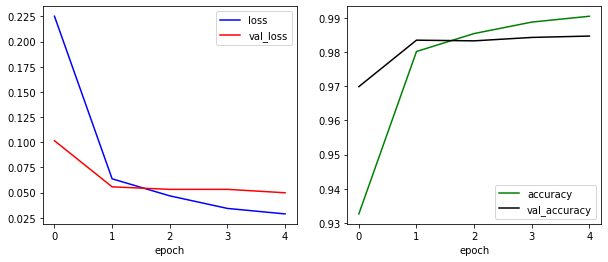

In [30]:
# 결과를 그림으로 그리기

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [32]:
# 학습된 모델을 테스트 데이터를 이용해 평가하기

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)

0.03863218426704407 0.9876000285148621
